In [1]:
from clustering import *
from utils import plot

In [ ]:
#df of log returns
df_5m = pd.read_parquet("data/clean/5m/data_clean_5m_log_ret.parquet")

In [2]:
#Rolling clustering for 5m dataset
#Compute T=3*N
N = df_5m.shape[1]
T = N // 3

#Number of windows possible
lag_max = df_5m.shape[0] - T
liste = RolledCluster(df_5m, T, "louvain_cluster/date/5m", True, False, lag_max)

In [3]:
liste_cluster = dask.compute(dask.compute(liste))[0][0]
#liste_cluster

In [4]:
number_of_clusters = []
for element in liste_cluster:
    number_of_clusters.append(len(element["Cluster"].unique()))

In [5]:
df_n_clusters = pd.DataFrame(number_of_clusters, columns=['Clusters'])
df_n_clusters["Datetime"] = df_5m[-len(df_n_clusters):].index

In [6]:
df_n_clusters

,Clusters,Datetime
0,3,2021-11-12 10:35:00-05:00
1,5,2021-11-12 10:40:00-05:00
2,4,2021-11-12 10:45:00-05:00
3,5,2021-11-12 10:50:00-05:00
4,4,2021-11-12 10:55:00-05:00
...,...,...
3347,4,2022-01-21 15:35:00-05:00
3348,4,2022-01-21 15:40:00-05:00
3349,3,2022-01-21 15:45:00-05:00
3350,4,2022-01-21 15:50:00-05:00


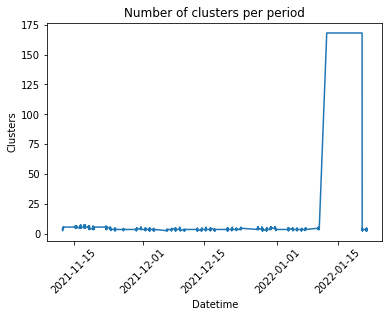

In [7]:
plot(df_n_clusters, x="Datetime", y="Clusters", title='Number of clusters per period')

In [8]:
df_n_clusters["ARI"] = [1] + RolledARI(liste_cluster)

100%|██████████| 3351/3351 [00:09<00:00, 345.58it/s]


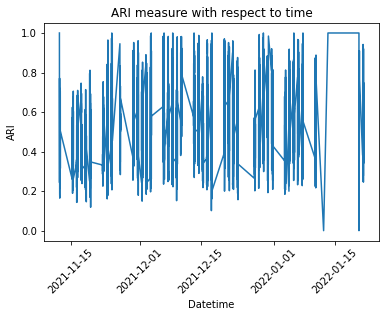

In [9]:
plot(df_n_clusters, x="Datetime", y="ARI", title='ARI measure with respect to time')